In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio
import cv2 as cv
from skimage import feature

##UTILIZAREMOS RADIO 1 Y 8 PIXELES AL REDEDOR DEL PIXEL CENTRAL PARA LA EXTRACCIÓN DE FEATURES DE MI IMAGEN

##CREAMOS LA FUNCIÓN lbp_ QUE TOMA COMO PARAMETROS LA IMAGEN, RADIO Y NÚMERO DE PIXELES A EVALUAR SOBRE EL PIXEL CENTRAL DE MI VENTANA.

##DECIDIMOS TAMBIEN NORMALIZAR CON MIN-MAX ESCALER Y DEFINIR NUESTRA IMAGEN SOBRE 8BITS PARA NO EXCEDERNOS POR DEBAJO DE 0 Y POR ARRIBA DE 255 CUANDO APLIQUEMOS LA NORMALIZACIÓN

##FEATURE.LOCAL_BINNARY_PATTERN CON METODO DEFAULT PARA NO TOMAR LBP UNIFORME

##DEVOLVEMOS EL HISTOGRAMA DE NUESTRO EXTRACTOR DE FEATURE, 10 BINS Y USANDO LBP.RAVEL() QUE DEVUELVE MIS FEATURES.

In [ ]:
def lpb_(img_, rad = 1 , samplig_pixels = 8, metodo = "default"):
  img = cv.imread(img_,0)
  img = img.astype(np.uint8)
  if np.max(img) - np.min(img) != 0 :
    img = (img - img.min())  / (img.max() - img.min())

  lbp = feature.local_binary_pattern(img , samplig_pixels , rad , method = metodo)
  hist,_=np.histogram (lbp.ravel(),np.arange(0,10))

  return hist

In [ ]:
def distance(a,b):
  return np.sqrt(sum(np.square(a-b)))

Text(0.5, 1.0, 'IMAGEN4')

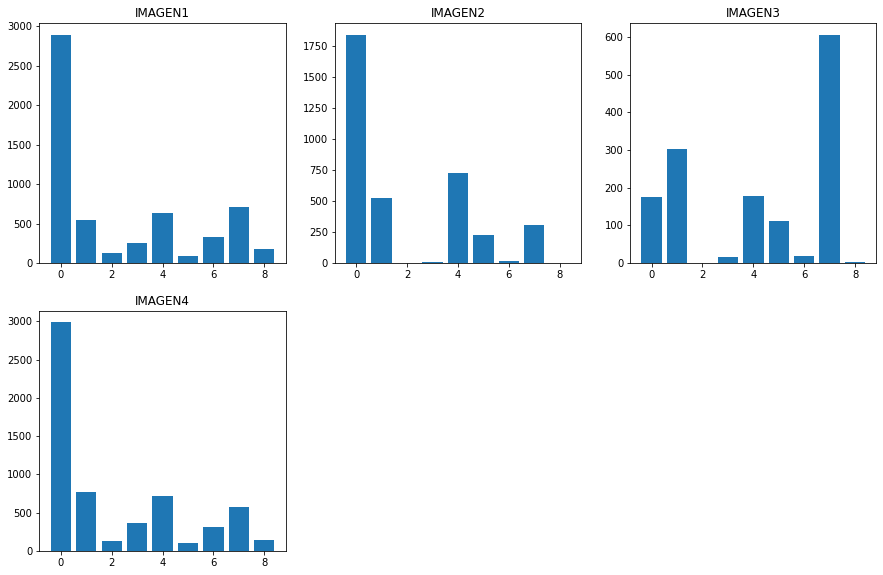

In [ ]:
t2 = lpb_("Imagen2.png",1,8, "default") #OVEJA
t3 = lpb_("Imagen3.png",1,8, "default") #OVEJA
t4 = lpb_("Imagen4.png",1,8, "default")
t5 = lpb_("Imagen5.png",1,8, "default") #OVEJA
#t6 = lpb_("DOG_1.jpg",1,8, "default")
vals = range(len(t2))

plt.figure(figsize=(15,15))

plt.subplot(331)
plt.bar(vals,t2)
plt.title("IMAGEN1")

plt.subplot(332)
plt.bar(vals,t3)
plt.title("IMAGEN2")

plt.subplot(333)
plt.bar(vals,t4)
plt.title("IMAGEN3")

plt.subplot(334)
plt.bar(vals,t5)
plt.title("IMAGEN4")

#plt.subplot(335)
#plt.bar(vals,t6)
#plt.title("IMAGEN5")

##Calculo de distancia para las imagenes parecidas, 1 y 2 en el caso predeterminado.

In [ ]:
distance(t2,t5)

307.46707140765494

Text(0.5, 1.0, 'IMAGEN4')

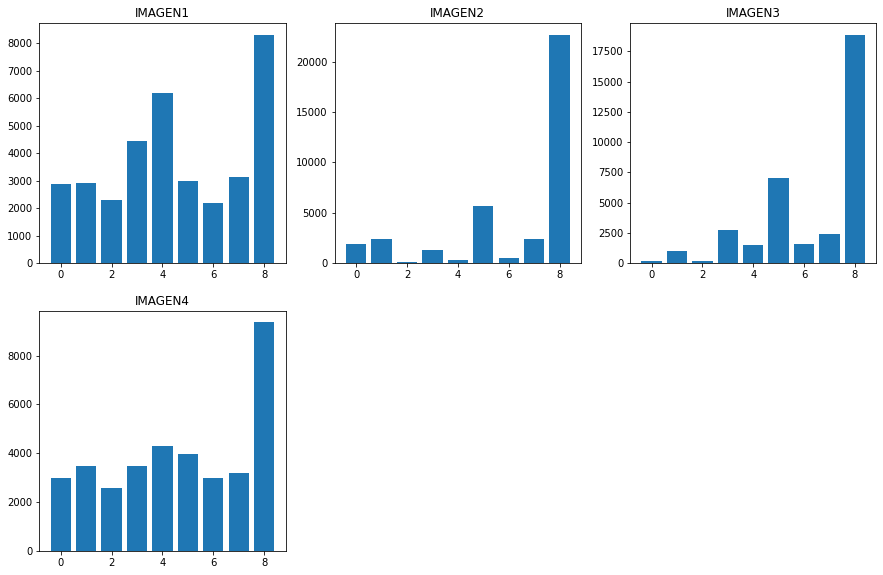

In [ ]:
t2 = lpb_("Imagen2.png",1,8, "uniform") #OVEJA
t3 = lpb_("Imagen3.png",1,8, "uniform") #OVEJA
t4 = lpb_("Imagen4.png",1,8, "uniform")
t5 = lpb_("Imagen5.png",1,8, "uniform") #OVEJA
#t6 = lpb_("DOG_1.jpg",1,8, "uniform")
vals = range(len(t2))

plt.figure(figsize=(15,15))

plt.subplot(331)
plt.bar(vals,t2)
plt.title("IMAGEN1")

plt.subplot(332)
plt.bar(vals,t3)
plt.title("IMAGEN2")

plt.subplot(333)
plt.bar(vals,t4)
plt.title("IMAGEN3")

plt.subplot(334)
plt.bar(vals,t5)
plt.title("IMAGEN4")

#plt.subplot(335)
#plt.bar(vals,t6)
#plt.title("IMAGEN5")

##Calculo de distancia para las imagenes parecidas, 1 y 2 en el caso uniforme.

In [ ]:
distance(t2,t5)

2749.2191618712395

Text(0.5, 1.0, 'IMAGEN4')

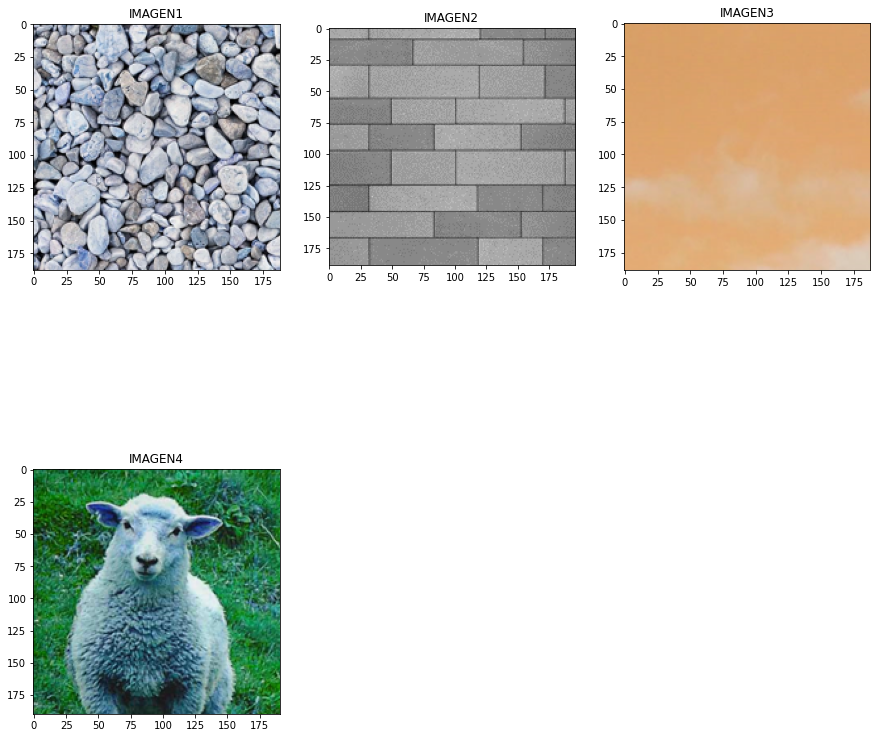

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(231)
plt.imshow(cv.imread("Imagen2.png"))
plt.title("IMAGEN1")

plt.subplot(232)
plt.imshow(cv.imread("Imagen3.png"))
plt.title("IMAGEN2")

plt.subplot(233)
plt.imshow(cv.imread("Imagen4.png"))
plt.title("IMAGEN3")

plt.subplot(234)
plt.imshow(cv.imread("Imagen5.png"))
plt.title("IMAGEN4")

#plt.subplot(235)
#plt.imshow(cv.imread("DOG_1.jpg"))
#plt.title("IMAGEN5")

##CONCLUSIONES: vemos que la distribución de features en los histogramas es muy parecida para la primera y última imagen para el lbp estandar y el uniforme, pero vemos que la distancia eculidiana en el caso estandar es mucho menor al uniforme, esto último se da por la data reducida pero mas completa que ofrece el caso uniforme que toma en cuenta los cambios de 1-0 y 0-1 y la invariación a rotación.

##Tenemos entonces dos imagenes que tienen casi los mismos cambios de grises, pero en diferentes escalas.

##Ejemplo:

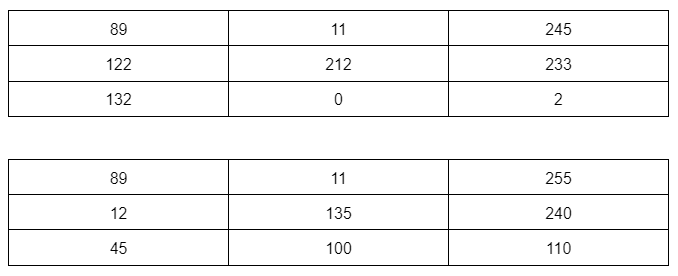

##Obtendremos el mismo valor en ambas celdas evauluadas, siendo de imagenes diferentes